In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/训练数据.csv')

In [4]:
data.reset_index(drop = True,inplace = True)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876


In [5]:
data['论坛情绪值0'] = data['论坛情绪值']
tag = 0 # 0为不改变，1为改变
states = data.loc[0,'论坛情绪值']   #首次状态值
for i in range(len(data)-1):
    if data.loc[i+1,'论坛情绪值'] != states:
        tag = tag + 1
        if tag == 3:
            states = data.loc[i+1,'论坛情绪值']
            tag = 0
        else:
            data.loc[i+1,'论坛情绪值'] = states
    else:
        tag = 0
        states = data.loc[i+1,'论坛情绪值']

In [6]:
data['黄金期货价格'] = data['黄金期货价格'].apply(np.log)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU,论坛情绪值0
0,2014-08-11,5.562795,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198,0.0
1,2014-08-12,5.564520,0.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198,1.0
2,2014-08-13,5.564712,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198,0.0
3,2014-08-14,5.567008,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198,0.0
4,2014-08-15,5.566052,0.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,6.327830,0.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876,1.0
2431,2024-08-06,6.317490,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876,0.0
2432,2024-08-07,6.320876,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876,0.0
2433,2024-08-08,6.320948,0.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876,1.0


In [7]:
x1 = []
x2 = []
y = []
for i in range(data.shape[0]-5):
    x1.append(data.loc[i:(i+4)][['黄金期货价格']].values)
    x2.append(data.loc[i:(i+4)][['论坛情绪值']].values)
    y.append(data.loc[i+5]['黄金期货价格'])

x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)

In [8]:
x2 = x2.reshape(x2.shape[0],x2.shape[1],1)
x2.shape

(2430, 5, 1)

In [9]:
x1_train = x1[:1944]
x2_train = x2[:1944]
y_train = y[:1944]

x1_test  = x1[1944:]
x2_test  = x2[1944:]
y_test  = y[1944:]

In [12]:
from sklearn import metrics

MSE = 0
RMSE = 0
MAE = 0
MAPE = 0
df = pd.DataFrame(y_test,columns=['truth'])

for i in range(5):
    from keras.models import Sequential
    from keras.layers import Input, Dense, LSTM, concatenate, multiply,Bidirectional
    from tensorflow.keras.layers import BatchNormalization
    from tensorflow.keras.models import Model

    model1 = Sequential()
    input1 = Input(shape=(5,1))
    model1 = Dense(200, activation='relu')(input1)
    model1 = Bidirectional(LSTM(units=200))(model1)
    model1 = (Dense(2000, activation="relu"))(model1)
    model1 = (Dense(200, activation="relu"))(model1)

    model2 = Sequential()
    input2 = Input(shape=(5,1))
    model2 = Dense(200, activation='relu')(input2)
    model2 = Bidirectional(LSTM(units=200))(model2)
    model2 = (Dense(2000, activation="relu"))(model2)
    model2 = (Dense(200, activation="relu"))(model2)

    conc = multiply([model1, model2])

    conc2 = (Dense(20, activation="relu"))(conc)
    out = (Dense(1, activation="linear"))(conc2)
    model = Model([input1, input2], out)
    model.summary()

    from keras.optimizers import Adam
    adam = Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss = 'mean_squared_error')
    model.fit([x1_train,x2_train],y_train,
                epochs=300,
                batch_size=256,
                validation_data=([x1_test,x2_test], y_test),
                verbose=1)

    pred = model.predict([x1_test,x2_test])
    pred = pred.ravel()
    df0 = pd.DataFrame(pred,columns=['pred'])
    df = pd.concat([df, df0], axis=1)
    MSE = MSE + metrics.mean_squared_error(np.exp(y_test), np.exp(pred))
    RMSE = RMSE + np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred)))
    MAE = MAE + np.sqrt(metrics.mean_absolute_error(np.exp(y_test), np.exp(pred)))
    MAPE = MAPE + np.sqrt(metrics.mean_absolute_percentage_error(np.exp(y_test), np.exp(pred)))

MSE = MSE/5
RMSE = RMSE/5
MAE = MAE/5
MAPE = MAPE/5

print("MSE:",MSE)    
print("RMSE:",RMSE)
print("MAE:",MAE)  
print("MAPE:",MAPE)
df

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_3 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 5, 200)            │             400 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 5, 200)            │             400 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional (Bidirectional) │ (None, 400)               │         641,600 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_1               │ (None, 400)               │         641,600 │ dense_5[0][0]              │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 2000)              │         802,000 │ bidirectional[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 2000)              │         802,000 │ bidirectional_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 200)               │         400,200 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 200)               │         400,200 │ dense_6[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply (Multiply)           │ (None, 200)               │               0 │ dense_4[0][0],             │
│                               │                           │                 │ dense_7[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 20)                │           4,020 │ multiply[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 1)                 │              21 │ dense_8[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 3,692,441 (14.09 MB)

 Trainable params: 3,692,441 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 196ms/step - loss: 32.6869 - val_loss: 37.1128
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 31.7484 - val_loss: 34.9946
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 28.3719 - val_loss: 27.6536
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 17.7854 - val_loss: 12.5357
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 7.6576 - val_loss: 11.5432
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 6.1855 - val_loss: 12.6085
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 6.1648 - val_loss: 10.1232
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 5.1533 - val_loss: 9.4897
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 4.7452 - val_loss: 9.1166
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 4.5249 - val_loss: 8.0034
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 4.3160 - val_loss: 7.4237
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0056 - val_loss: 0.0329
Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0056 - val_loss: 0.0327
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0055 - val_loss: 0.0316
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0054 - val_loss: 0.0318
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0055 - val_loss: 0.0326
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0054 - val_loss: 0.0314
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0055 - val_loss: 0.0371
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0054 - val_loss: 0.0289
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0052 - val_loss: 0.0306
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0052 - val_loss: 0.0308
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0050 - val_loss: 0.0274
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0052 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0021 - val_loss: 0.0154
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0022 - val_loss: 0.0104
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0021 - val_loss: 0.0142
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0020 - val_loss: 0.0094
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0021 - val_loss: 0.0117
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0022 - val_loss: 0.0135
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0019 - val_loss: 0.0121
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.0018 - val_loss: 0.0116
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0019 - val_loss: 0.0111
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0017 - val_loss: 0.0096
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0017 - val_loss: 0.0097
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss:

Epoch 204/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 4.9265e-04 - val_loss: 0.0029
Epoch 205/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 4.6573e-04 - val_loss: 0.0029
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 4.4949e-04 - val_loss: 0.0028
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 4.2841e-04 - val_loss: 0.0025
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 4.2192e-04 - val_loss: 0.0019
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 4.2422e-04 - val_loss: 0.0020
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 4.0298e-04 - val_loss: 0.0020
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 3.9742e-04 - val_loss: 0.0019
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 4.0253e-04 - val_loss: 0.0021
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 3.6624e-04 - val_loss: 0.0017
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 3.6922e-04 - val_loss: 0.0019

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 1.9496e-04 - val_loss: 5.8292e-04
Epoch 269/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 1.8143e-04 - val_loss: 3.5683e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 2.1383e-04 - val_loss: 7.2882e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 1.9543e-04 - val_loss: 3.7062e-04
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 2.0786e-04 - val_loss: 3.9489e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 1.7955e-04 - val_loss: 4.5820e-04
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 1.9327e-04 - val_loss: 3.8155e-04
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 1.9923e-04 - val_loss: 5.5117e-04
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 1.9345e-04 - val_loss: 2.7339e-04
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 2.1375e-04 - val_loss: 4.6458e-04
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 1.7

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_5 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_13 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_2               │ (None, 400)               │         641,600 │ dense_10[0][0]             │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_3               │ (None, 400)               │         641,600 │ dense_13[0][0]             │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 2000)              │         802,000 │ bidirectional_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_14 (Dense)              │ (None, 2000)              │         802,000 │ bidirectional_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 200)               │         400,200 │ dense_11[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_15 (Dense)              │ (None, 200)               │         400,200 │ dense_14[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_1 (Multiply)         │ (None, 200)               │               0 │ dense_12[0][0],            │
│                               │                           │                 │ dense_15[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_16 (Dense)              │ (None, 20)                │           4,020 │ multiply_1[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_17 (Dense)              │ (None, 1)                 │              21 │ dense_16[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 3,692,441 (14.09 MB)

 Trainable params: 3,692,441 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - loss: 32.6255 - val_loss: 37.4194
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 32.2619 - val_loss: 36.5176
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 30.8427 - val_loss: 33.2929
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 25.8681 - val_loss: 23.2661
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 12.9678 - val_loss: 13.1333
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 8.7060 - val_loss: 12.1336
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 6.4787 - val_loss: 12.8536
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 6.2548 - val_loss: 10.6685
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 5.5866 - val_loss: 10.1955
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 5.1521 - val_loss: 9.9872
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 4.8933 - val_loss: 9.0442
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/st

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0090 - val_loss: 0.0452
Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0084 - val_loss: 0.0455
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0084 - val_loss: 0.0406
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0084 - val_loss: 0.0444
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0082 - val_loss: 0.0452
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0082 - val_loss: 0.0449
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0079 - val_loss: 0.0426
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0080 - val_loss: 0.0478
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0079 - val_loss: 0.0451
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0077 - val_loss: 0.0459
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0076 - val_loss: 0.0424
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0078 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0030 - val_loss: 0.0179
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0029 - val_loss: 0.0144
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0028 - val_loss: 0.0187
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0027 - val_loss: 0.0152
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0027 - val_loss: 0.0166
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0025 - val_loss: 0.0144
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0025 - val_loss: 0.0174
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0025 - val_loss: 0.0128
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0025 - val_loss: 0.0156
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0024 - val_loss: 0.0121
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0024 - val_loss: 0.0188
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - lo

Epoch 204/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.8842e-04 - val_loss: 0.0033
Epoch 205/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.6793e-04 - val_loss: 0.0030
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.3890e-04 - val_loss: 0.0032
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.6494e-04 - val_loss: 0.0025
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 4.1257e-04 - val_loss: 0.0027
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 4.1455e-04 - val_loss: 0.0023
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 3.6993e-04 - val_loss: 0.0018
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 3.7631e-04 - val_loss: 0.0018
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 3.6648e-04 - val_loss: 0.0021
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 3.5493e-04 - val_loss: 0.0017
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 3.5920e-04 - val_loss: 0.0018

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 1.9256e-04 - val_loss: 5.7362e-04
Epoch 269/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 1.8088e-04 - val_loss: 2.8596e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 1.9317e-04 - val_loss: 5.6937e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 1.8605e-04 - val_loss: 5.1672e-04
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 1.9472e-04 - val_loss: 3.8984e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 1.8129e-04 - val_loss: 4.3836e-04
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 1.7587e-04 - val_loss: 3.8952e-04
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 1.6623e-04 - val_loss: 7.1526e-04
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 2.2188e-04 - val_loss: 2.3894e-04
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 2.0384e-04 - val_loss: 3.0259e-04
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 1.9

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_7 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_18 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_21 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_4               │ (None, 400)               │         641,600 │ dense_18[0][0]             │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_5               │ (None, 400)               │         641,600 │ dense_21[0][0]             │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_19 (Dense)              │ (None, 2000)              │         802,000 │ bidirectional_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_22 (Dense)              │ (None, 2000)              │         802,000 │ bidirectional_5[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_20 (Dense)              │ (None, 200)               │         400,200 │ dense_19[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_23 (Dense)              │ (None, 200)               │         400,200 │ dense_22[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_2 (Multiply)         │ (None, 200)               │               0 │ dense_20[0][0],            │
│                               │                           │                 │ dense_23[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_24 (Dense)              │ (None, 20)                │           4,020 │ multiply_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_25 (Dense)              │ (None, 1)                 │              21 │ dense_24[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 3,692,441 (14.09 MB)

 Trainable params: 3,692,441 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - loss: 32.6692 - val_loss: 37.1644
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 31.8169 - val_loss: 35.1933
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 28.7415 - val_loss: 28.4291
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 18.8024 - val_loss: 13.5264
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 8.0225 - val_loss: 12.1396
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 6.4141 - val_loss: 13.0165
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 6.8234 - val_loss: 10.8718
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 5.7279 - val_loss: 10.0226
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 5.2126 - val_loss: 9.9206
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 4.8797 - val_loss: 8.8567
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 4.5763 - val_loss: 8.2457
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0043 - val_loss: 0.0237
Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0043 - val_loss: 0.0223
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0043 - val_loss: 0.0233
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0042 - val_loss: 0.0260
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0041 - val_loss: 0.0257
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0041 - val_loss: 0.0233
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0041 - val_loss: 0.0208
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0041 - val_loss: 0.0193
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0043 - val_loss: 0.0221
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0040 - val_loss: 0.0234
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0038 - val_loss: 0.0250
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0039 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0020 - val_loss: 0.0112
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0020 - val_loss: 0.0125
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0020 - val_loss: 0.0086
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0020 - val_loss: 0.0135
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0019 - val_loss: 0.0079
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0020 - val_loss: 0.0145
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0020 - val_loss: 0.0083
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0019 - val_loss: 0.0144
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0020 - val_loss: 0.0084
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0017 - val_loss: 0.0130
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0018 - val_loss: 0.0088
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - lo

Epoch 204/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 6.4125e-04 - val_loss: 0.0042
Epoch 205/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 6.1039e-04 - val_loss: 0.0033
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 5.8804e-04 - val_loss: 0.0043
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 6.0709e-04 - val_loss: 0.0034
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 5.9208e-04 - val_loss: 0.0024
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 6.4270e-04 - val_loss: 0.0029
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 5.5354e-04 - val_loss: 0.0040
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 6.0096e-04 - val_loss: 0.0040
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 5.2623e-04 - val_loss: 0.0029
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 5.1622e-04 - val_loss: 0.0027
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 5.0751e-04 - val_loss: 0.0027

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 2.3497e-04 - val_loss: 6.0742e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.4906e-04 - val_loss: 8.1798e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 2.2280e-04 - val_loss: 7.9128e-04
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 2.2206e-04 - val_loss: 6.0468e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 2.4778e-04 - val_loss: 9.2503e-04
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 2.3170e-04 - val_loss: 8.6313e-04
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 2.1087e-04 - val_loss: 8.3753e-04
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 2.1450e-04 - val_loss: 6.8816e-04
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 2.1968e-04 - val_loss: 9.4921e-04
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.2041e-04 - val_loss: 7.6524e-04
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 2.0

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_9 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_26 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_29 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_6               │ (None, 400)               │         641,600 │ dense_26[0][0]             │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_7               │ (None, 400)               │         641,600 │ dense_29[0][0]             │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_27 (Dense)              │ (None, 2000)              │         802,000 │ bidirectional_6[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_30 (Dense)              │ (None, 2000)              │         802,000 │ bidirectional_7[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_28 (Dense)              │ (None, 200)               │         400,200 │ dense_27[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_31 (Dense)              │ (None, 200)               │         400,200 │ dense_30[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_3 (Multiply)         │ (None, 200)               │               0 │ dense_28[0][0],            │
│                               │                           │                 │ dense_31[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_32 (Dense)              │ (None, 20)                │           4,020 │ multiply_3[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_33 (Dense)              │ (None, 1)                 │              21 │ dense_32[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 3,692,441 (14.09 MB)

 Trainable params: 3,692,441 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - loss: 32.6393 - val_loss: 37.1980
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 31.8664 - val_loss: 35.3704
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 28.9697 - val_loss: 28.9125
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 19.4155 - val_loss: 13.9279
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 7.8018 - val_loss: 12.3986
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 6.7676 - val_loss: 13.2854
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 6.8014 - val_loss: 11.0667
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 5.6622 - val_loss: 10.2328
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 5.3421 - val_loss: 10.1178
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 5.2205 - val_loss: 9.0930
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 4.4526 - val_loss: 8.4593
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/ste

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0051 - val_loss: 0.0291
Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0051 - val_loss: 0.0260
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0051 - val_loss: 0.0247
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0052 - val_loss: 0.0262
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0050 - val_loss: 0.0325
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0050 - val_loss: 0.0268
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0050 - val_loss: 0.0283
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0047 - val_loss: 0.0281
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0047 - val_loss: 0.0287
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0047 - val_loss: 0.0276
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0046 - val_loss: 0.0264
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0045 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0022 - val_loss: 0.0125
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0022 - val_loss: 0.0138
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0021 - val_loss: 0.0115
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0021 - val_loss: 0.0117
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0020 - val_loss: 0.0116
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0020 - val_loss: 0.0107
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0019 - val_loss: 0.0103
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0019 - val_loss: 0.0111
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0018 - val_loss: 0.0103
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0018 - val_loss: 0.0112
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0018 - val_loss: 0.0114
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - lo

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 5.8021e-04 - val_loss: 0.0033
Epoch 205/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 5.5965e-04 - val_loss: 0.0030
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 5.8306e-04 - val_loss: 0.0048
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 6.8174e-04 - val_loss: 0.0036
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 5.5972e-04 - val_loss: 0.0038
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 5.3890e-04 - val_loss: 0.0032
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 5.0815e-04 - val_loss: 0.0028
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.9393e-04 - val_loss: 0.0031
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.9396e-04 - val_loss: 0.0033
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.7309e-04 - val_loss: 0.0026
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 4.6071e-04 - val_loss: 0.0021
Epoch 215/300

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 2.7115e-04 - val_loss: 9.8380e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.2212e-04 - val_loss: 5.6548e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 2.1048e-04 - val_loss: 6.0493e-04
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.0935e-04 - val_loss: 0.0011
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.3067e-04 - val_loss: 7.2655e-04
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.1600e-04 - val_loss: 4.1562e-04
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 2.4214e-04 - val_loss: 6.5899e-04
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.3902e-04 - val_loss: 8.1896e-04
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 2.6652e-04 - val_loss: 3.3633e-04
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.4600e-04 - val_loss: 7.3043e-04
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.0366e

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_11 (InputLayer)   │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_34 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_37 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_8               │ (None, 400)               │         641,600 │ dense_34[0][0]             │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_9               │ (None, 400)               │         641,600 │ dense_37[0][0]             │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_35 (Dense)              │ (None, 2000)              │         802,000 │ bidirectional_8[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_38 (Dense)              │ (None, 2000)              │         802,000 │ bidirectional_9[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_36 (Dense)              │ (None, 200)               │         400,200 │ dense_35[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_39 (Dense)              │ (None, 200)               │         400,200 │ dense_38[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_4 (Multiply)         │ (None, 200)               │               0 │ dense_36[0][0],            │
│                               │                           │                 │ dense_39[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_40 (Dense)              │ (None, 20)                │           4,020 │ multiply_4[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_41 (Dense)              │ (None, 1)                 │              21 │ dense_40[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 3,692,441 (14.09 MB)

 Trainable params: 3,692,441 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - loss: 32.6677 - val_loss: 37.1852
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 31.8232 - val_loss: 35.1473
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 28.5573 - val_loss: 28.0473
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 18.3677 - val_loss: 13.0206
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 7.6694 - val_loss: 11.7242
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 6.2265 - val_loss: 12.2997
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 5.9916 - val_loss: 10.1143
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 5.1605 - val_loss: 9.5157
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 4.8642 - val_loss: 8.8899
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 4.4870 - val_loss: 7.7488
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 3.9329 - val_loss: 7.0793
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0055 - val_loss: 0.0337
Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0055 - val_loss: 0.0293
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0056 - val_loss: 0.0363
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0055 - val_loss: 0.0309
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0057 - val_loss: 0.0262
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0054 - val_loss: 0.0315
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0051 - val_loss: 0.0271
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0052 - val_loss: 0.0311
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0051 - val_loss: 0.0299
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0050 - val_loss: 0.0302
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0049 - val_loss: 0.0265
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0050 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0023 - val_loss: 0.0116
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0021 - val_loss: 0.0108
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0020 - val_loss: 0.0146
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0020 - val_loss: 0.0118
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0019 - val_loss: 0.0101
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0018 - val_loss: 0.0115
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0019 - val_loss: 0.0108
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0018 - val_loss: 0.0114
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0018 - val_loss: 0.0092
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0018 - val_loss: 0.0097
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0017 - val_loss: 0.0093
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - lo

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 5.1395e-04 - val_loss: 0.0020
Epoch 204/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 4.6608e-04 - val_loss: 0.0022
Epoch 205/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.9164e-04 - val_loss: 0.0014
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 5.6882e-04 - val_loss: 0.0020
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 4.6517e-04 - val_loss: 0.0031
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 4.6963e-04 - val_loss: 0.0025
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.3095e-04 - val_loss: 0.0021
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.2822e-04 - val_loss: 0.0014
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 4.1144e-04 - val_loss: 0.0022
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 3.8427e-04 - val_loss: 0.0018
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 3.7381e-04 - val_loss: 0.0017
Epoch 214/300

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 1.8564e-04 - val_loss: 4.2354e-04
Epoch 268/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 1.8865e-04 - val_loss: 7.3344e-04
Epoch 269/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.0608e-04 - val_loss: 4.5138e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 1.8828e-04 - val_loss: 5.1259e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 1.8223e-04 - val_loss: 6.6995e-04
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.1217e-04 - val_loss: 5.8591e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 1.9731e-04 - val_loss: 3.3036e-04
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 2.0942e-04 - val_loss: 5.1014e-04
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 2.3014e-04 - val_loss: 7.7276e-04
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 2.3045e-04 - val_loss: 2.5844e-04
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 1.9

,truth,pred,pred,pred,pred,pred
0,5.969168,5.968034,5.970929,5.954318,5.946622,5.956751
1,5.965018,5.971435,5.976609,5.959818,5.952207,5.960796
2,5.969270,5.968447,5.972254,5.956700,5.950942,5.960569
3,5.971262,5.965991,5.970792,5.957620,5.951882,5.958950
4,5.970037,5.968760,5.974850,5.961334,5.957552,5.962603
...,...,...,...,...,...,...
481,6.327830,6.319859,6.327881,6.309884,6.307970,6.316846
482,6.317490,6.318925,6.326747,6.309055,6.307044,6.315754
483,6.320876,6.316437,6.324027,6.306490,6.304430,6.313126
484,6.320948,6.313576,6.321074,6.303493,6.301435,6.310257


In [13]:
df.to_csv('./data/BiLSTM+修正论坛情绪值-预测值.csv',header=True,index=False)

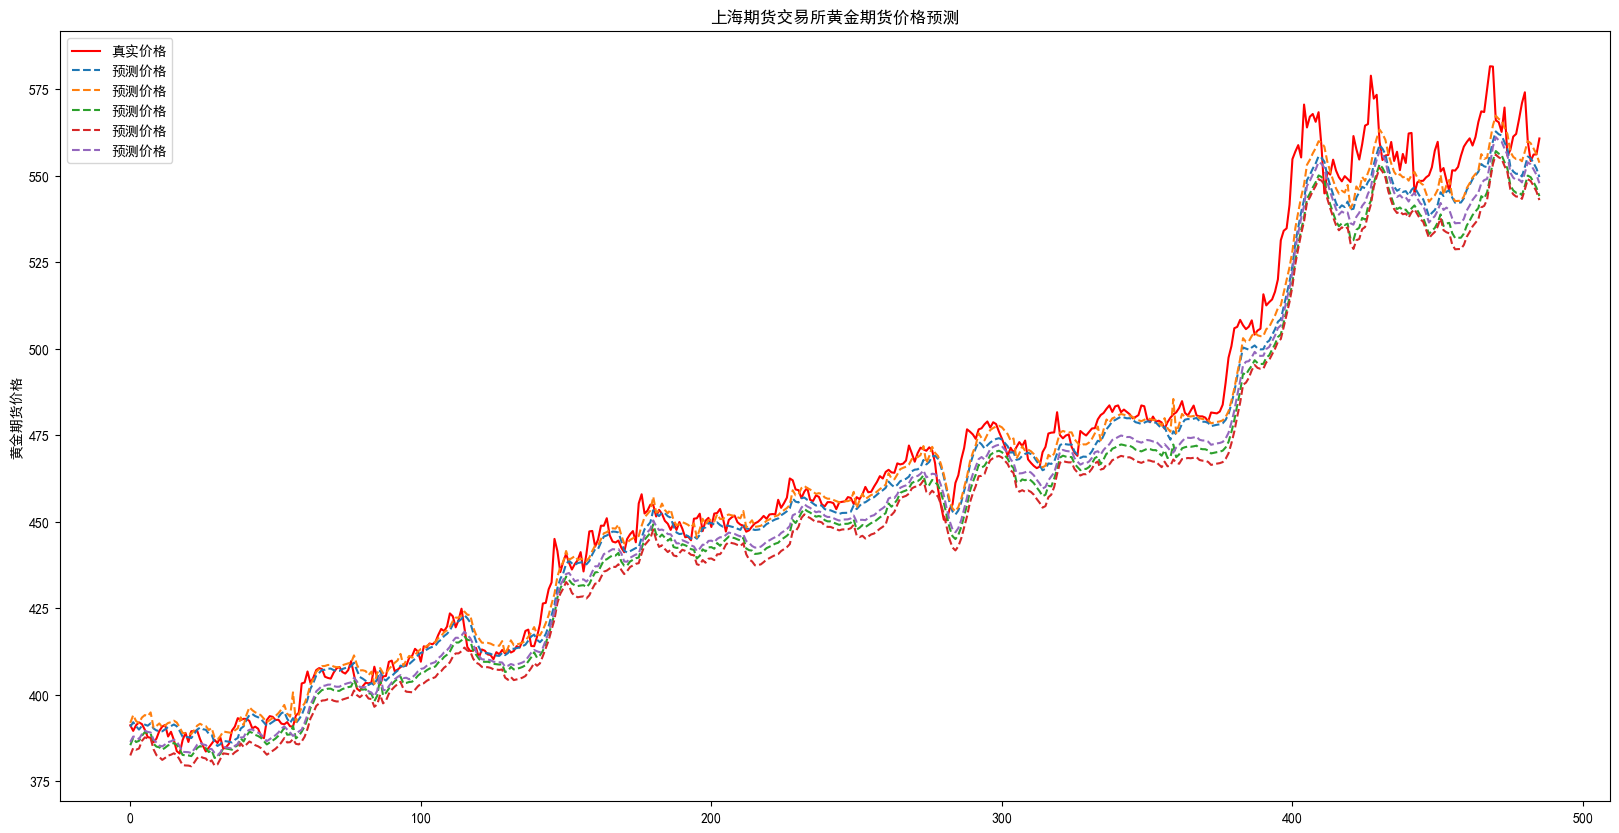

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.figure(figsize=(20,10))
plt.plot(np.exp(df.truth), 'r', label='真实价格')
plt.plot(np.exp(df.pred), '--', label='预测价格')
plt.title('上海期货交易所黄金期货价格预测')
plt.ylabel('黄金期货价格')
plt.legend()
plt.show()